In [ ]:
import pandas as pd
# Creating a simple Series
data = [10, 20, 30, 40]
series = pd.Series(data)
print(series)

0    10
1    20
2    30
3    40
dtype: int64


In [ ]:
# Default Index
import pandas as pd
series = pd.Series([10, 20, 30])
print(series.index)
# Output: RangeIndex(start=0, stop=3, step=1)
# User Defined:
series = pd.Series([10, 20, 30],index=['a','b','c'])
print(series)
#datestime index
dates = pd.date_range('2023-01-01', periods=3)
series = pd.Series([10, 20, 30], index=dates)
print(series)

RangeIndex(start=0, stop=3, step=1)
a    10
b    20
c    30
dtype: int64
2023-01-01    10
2023-01-02    20
2023-01-03    30
Freq: D, dtype: int64


In [ ]:
import pandas as pd
# Sample DataFrame
data = {
'Name': ['Alice', 'Bob', 'Charlie'],
'Age': [25, 30, 35],
'Salary': [50000, 60000, 70000]
}
df = pd.DataFrame(data)
# View the first two rows
print(df.head(2))
# View the last row
print(df.tail(1))
# DataFrame information
print(df.info())
# Summary statistics
print(df.describe())
# Check dimensions of the DataFrame
print(f"The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.")
# Access the ’Age’ column
print(df['Age'])
# Select rows by numerical index
print(df.iloc[0]) # First row
# Select rows by condition
print(df.loc[df['Age'] > 30]) # Rows where Age > 30

    Name  Age  Salary
0  Alice   25   50000
1    Bob   30   60000
      Name  Age  Salary
2  Charlie   35   70000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    3 non-null      object
 1   Age     3 non-null      int64 
 2   Salary  3 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 200.0+ bytes
None
        Age   Salary
count   3.0      3.0
mean   30.0  60000.0
std     5.0  10000.0
min    25.0  50000.0
25%    27.5  55000.0
50%    30.0  60000.0
75%    32.5  65000.0
max    35.0  70000.0
The DataFrame has 3 rows and 3 columns.
0    25
1    30
2    35
Name: Age, dtype: int64
Name      Alice
Age          25
Salary    50000
Name: 0, dtype: object
      Name  Age  Salary
2  Charlie   35   70000


In [ ]:
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/Week 2/Datasets-20241202T014921Z-001/Datasets/bank .csv")
print(data.info())

object_columns = data.select_dtypes(include=['object']).columns
print(f"Columns with dtype 'object': {object_columns}")

for col in object_columns:
    print(f"Unique values in column '{col}': {data[col].unique()}")

null_values = data.isnull().sum()
print(f"Total number of null values in each column:\n{null_values}")

numeric_data = data.drop(columns=object_columns)

numeric_data.to_csv("/content/drive/MyDrive/Week 2/Datasets-20241202T014921Z-001/Datasets/banknumericdata .csv", index=False)

numeric_data_summary = pd.read_csv("/content/drive/MyDrive/Week 2/Datasets-20241202T014921Z-001/Datasets/banknumericdata .csv")
summary_statistics = numeric_data_summary.describe()
print(f"Summary statistics:\n{summary_statistics}")
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Week 2/Datasets-20241202T014921Z-001/Datasets/banknumericdata .csv")
print(data.head())

print(data.info())

missing_data = data.isnull().sum()
print(f"Columns with missing values:\n{missing_data}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   day       45211 non-null  int64
 3   duration  45211 non-null  int64
 4   campaign  45211 non-null  int64
 5   pdays     45211 non-null  int64
 6   previous  45211 non-null  int64
dtypes: int64(7)
memory usage: 2.4 MB
None
Columns with dtype 'object': Index([], dtype='object')
Total number of null values in each column:
age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64
Summary statistics:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.3224

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Week 2/Datasets-20241202T014921Z-001/Datasets/medical_students_dataset.csv')
print(data.head())

print(data.info())

missing_data = data.isnull().sum()
print(f"Columns with missing values:\n{missing_data}")


for column in missing_data[missing_data > 0].index:
    print(f"Missing values in column: {column}")

    if data[column].dtype in ['float64', 'int64']:
        if data[column].skew() > 1:
            data[column].fillna(data[column].median(), inplace=True)
            print(f"Filled missing values in '{column}' using median.")
        else:
            data[column].fillna(data[column].mean(), inplace=True)
            print(f"Filled missing values in '{column}' using mean.")

    elif data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)
        print(f"Filled missing values in '{column}' using mode.")

duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    data.drop_duplicates(inplace=True)
    print(f"Duplicates removed. Remaining rows: {len(data)}")
else:
    print("No duplicates found.")

print(data.head())

   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (t

<ipython-input-4-017fd2794777>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
<ipython-input-4-017fd2794777>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

Filled missing values in 'Diabetes' using mode.
Missing values in column: Smoking
Filled missing values in 'Smoking' using mode.
Number of duplicate rows: 12572
Duplicates removed. Remaining rows: 187428
     Student ID        Age  Gender      Height     Weight Blood Type  \
0      1.000000  18.000000  Female  161.777924  72.354947          O   
1      2.000000  26.021561    Male  152.069157  47.630941          B   
2      3.000000  32.000000  Female  182.537664  55.741083          A   
3  49974.042078  30.000000    Male  182.112867  63.332207          B   
4      5.000000  23.000000  Female  174.947103  46.234173          O   

         BMI  Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes  \
0  27.645835    98.600948        95.0      109.000000        203.0       No   
1  23.338869    98.714977        93.0      104.000000        163.0       No   
2  16.729017    98.260293        76.0      130.000000        216.0      Yes   
3  19.096042    98.839605        99.0      112.

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Week 2/Datasets-20241202T014921Z-001/Datasets/Titanic-Dataset.csv')

subset_data = data[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

first_class_data = subset_data[subset_data['Pclass'] == 1]

mean_fare = first_class_data['Fare'].mean()
median_fare = first_class_data['Fare'].median()
max_fare = first_class_data['Fare'].max()
min_fare = first_class_data['Fare'].min()

print(f"Mean Fare: {mean_fare}")
print(f"Median Fare: {median_fare}")
print(f"Maximum Fare: {max_fare}")
print(f"Minimum Fare: {min_fare}")


Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


Problem 1: Fare Statistics for First-Class Passengers
Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


Problem 2: Number of null values in 'Age' column: 30
After dropping, the shape of the data: (186, 6)


Problem 3: Data with One-Hot Encoded 'Embarked' columns
   Embarked_C  Embarked_Q  Embarked_S
0       False       False        True
1        True       False       False
2       False       False        True
3       False       False        True
4       False       False        True




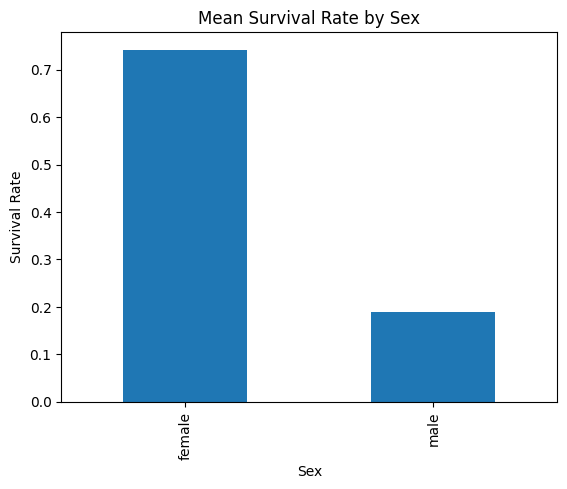

Problem 4: Mean Survival Rate by Sex
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64




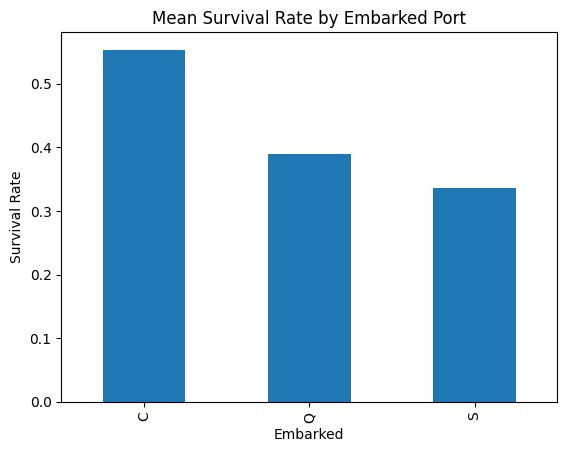

Problem 5: Mean Survival Rate by Embarked Port
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64




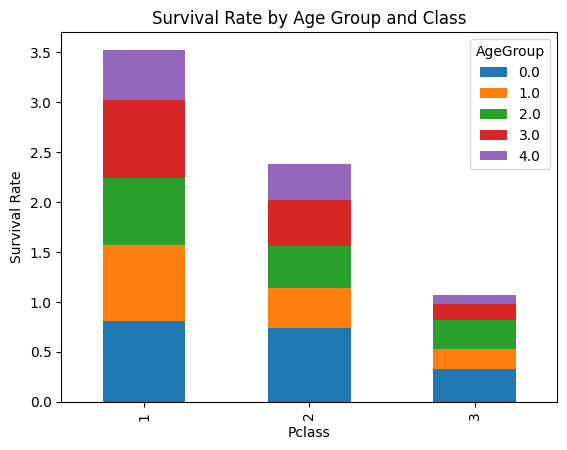

Problem 6: Survival Rate by Age Group and Passenger Class
Pclass  AgeGroup
1       0.0         0.809524
        1.0         0.761905
        2.0         0.666667
        3.0         0.777778
        4.0         0.506667
2       0.0         0.742857
        1.0         0.400000
        2.0         0.416667
        3.0         0.461538
        4.0         0.363636
3       0.0         0.333333
        1.0         0.197674
        2.0         0.283582
        3.0         0.166667
        4.0         0.088235
Name: Survived, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Week 2/Datasets-20241202T014921Z-001/Datasets/Titanic-Dataset.csv')

subset_data = data[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

first_class_data = subset_data[subset_data['Pclass'] == 1]

mean_fare = first_class_data['Fare'].mean()
median_fare = first_class_data['Fare'].median()
max_fare = first_class_data['Fare'].max()
min_fare = first_class_data['Fare'].min()

print(f"Problem 1: Fare Statistics for First-Class Passengers")
print(f"Mean Fare: {mean_fare}")
print(f"Median Fare: {median_fare}")
print(f"Maximum Fare: {max_fare}")
print(f"Minimum Fare: {min_fare}")
print("\n")

null_age_count = first_class_data['Age'].isnull().sum()
first_class_data_clean = first_class_data.dropna(subset=['Age'])

print(f"Problem 2: Number of null values in 'Age' column: {null_age_count}")
print(f"After dropping, the shape of the data: {first_class_data_clean.shape}")
print("\n")

embarked_encoded = pd.get_dummies(data['Embarked'], prefix='Embarked')
data_with_embarked = data.join(embarked_encoded)
data_with_embarked = data_with_embarked.drop(columns=['Embarked'])

print(f"Problem 3: Data with One-Hot Encoded 'Embarked' columns")
print(data_with_embarked[['Embarked_C', 'Embarked_Q', 'Embarked_S']].head())
print("\n")

survival_by_sex = data.groupby('Sex')['Survived'].mean()

survival_by_sex.plot(kind='bar', title='Mean Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

print(f"Problem 4: Mean Survival Rate by Sex")
print(survival_by_sex)
print("\n")

survival_by_embarked = data.groupby('Embarked')['Survived'].mean()

survival_by_embarked.plot(kind='bar', title='Mean Survival Rate by Embarked Port')
plt.ylabel('Survival Rate')
plt.show()

print(f"Problem 5: Mean Survival Rate by Embarked Port")
print(survival_by_embarked)
print("\n")

data['AgeGroup'] = pd.qcut(data['Age'], 5, labels=False)

survival_by_class_age = data.groupby(['Pclass', 'AgeGroup'])['Survived'].mean()

survival_by_class_age.unstack().plot(kind='bar', stacked=True, title='Survival Rate by Age Group and Class')
plt.ylabel('Survival Rate')
plt.show()

print(f"Problem 6: Survival Rate by Age Group and Passenger Class")
print(survival_by_class_age)
